# <center>Demo on Hashing</center> 

## Import libraries and Load data

In [39]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [40]:
# Reading multiple images from a folder and storing it in a list.
folder = "./YALE"
images = []
for file in os.listdir(folder):
    img = mpimg.imread(os.path.join(folder, file))
    if img is not None:
        images.append(img)

In [41]:
# Vectorizing the images and storing it in a list
image_vector = []
for image in images:
    row,col = image.shape
    img_vec = image.reshape(row*col)
    img_vec_norm = img_vec / np.linalg.norm(img_vec)  # Converting the image vector to a unit vector
    image_vector.append(img_vec_norm)

# Locality Sensitive Hashing – Random Projections

In [42]:
def genRandomHashVectors(m, length):  # Generate random unit vectors for Hashing
    hash_vector = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        vcap = v / np.linalg.norm(v)
        hash_vector.append(vcap)
    return hash_vector    

In [43]:
def localSensitiveHashing(hash_vector ,data): 
    hash_code = []
    for i in range(len(hash_vector)):
        if np.dot(data,hash_vector[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return ''.join(hash_code)   

In [44]:
hash_vector = genRandomHashVectors(20,len(image_vector[0]))
print(localSensitiveHashing(hash_vector,image_vector[0]))

01001111111100011001


In [45]:
# Creating a Image Dictionary using the hash as the keys
image_dict = {}
for i in range(len(image_vector)):
    hash_code = localSensitiveHashing(hash_vector,image_vector[i])
    if hash_code not in image_dict.keys():
        image_dict[hash_code] = [i]
    else:
        image_dict[hash_code].append(i)     

In [46]:
# Getting the keys and values of the Dictionary
keys = list(image_dict.keys())
values = list(image_dict.values())

In [47]:
print(image_dict)

{'01001111111100011001': [0, 38, 48, 50, 52, 54, 56, 68, 71, 78, 87, 93, 100, 110, 137, 154, 164], '11001111111100011001': [1], '01001111111101011000': [2, 140, 145], '11001111111100011000': [3, 34, 66, 107, 114, 143], '01001101111101011000': [4], '01001111110101011101': [5, 6, 13, 27, 33, 46, 101, 119, 121, 125, 155], '11001111111001001000': [7], '01101111110101011001': [8], '01001111111100011000': [9, 10, 12, 22, 31, 45, 64, 83, 97, 124, 126, 136, 142], '01001111111100011100': [11, 92, 139, 158], '11011101100111011001': [14], '01001111111101011001': [15, 29, 42, 58, 99, 111, 130], '01001101110101011001': [16, 18, 147], '11001110110101001100': [17], '01001110111100011000': [19, 40, 74, 118, 123, 146], '11001101111101011001': [20], '11001110110100011100': [21, 129], '11001111111100011100': [23, 75, 77, 106, 148], '01010111111100011101': [24], '01101111111100011100': [25, 59], '01101111111100011001': [26], '01001110111101011100': [28], '01001110111100011101': [30, 138], '110011101111010

In [48]:
# Plotting images with same hash code
def plotImages(images, img_indices):
    imgs = [images[i] for i in range(len(images)) if i in img_indices]
    fig = plt.figure()
    cols = 2
    n_images = len(imgs)
    for n,image in zip(range(n_images),imgs):
        ax = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.gray()
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

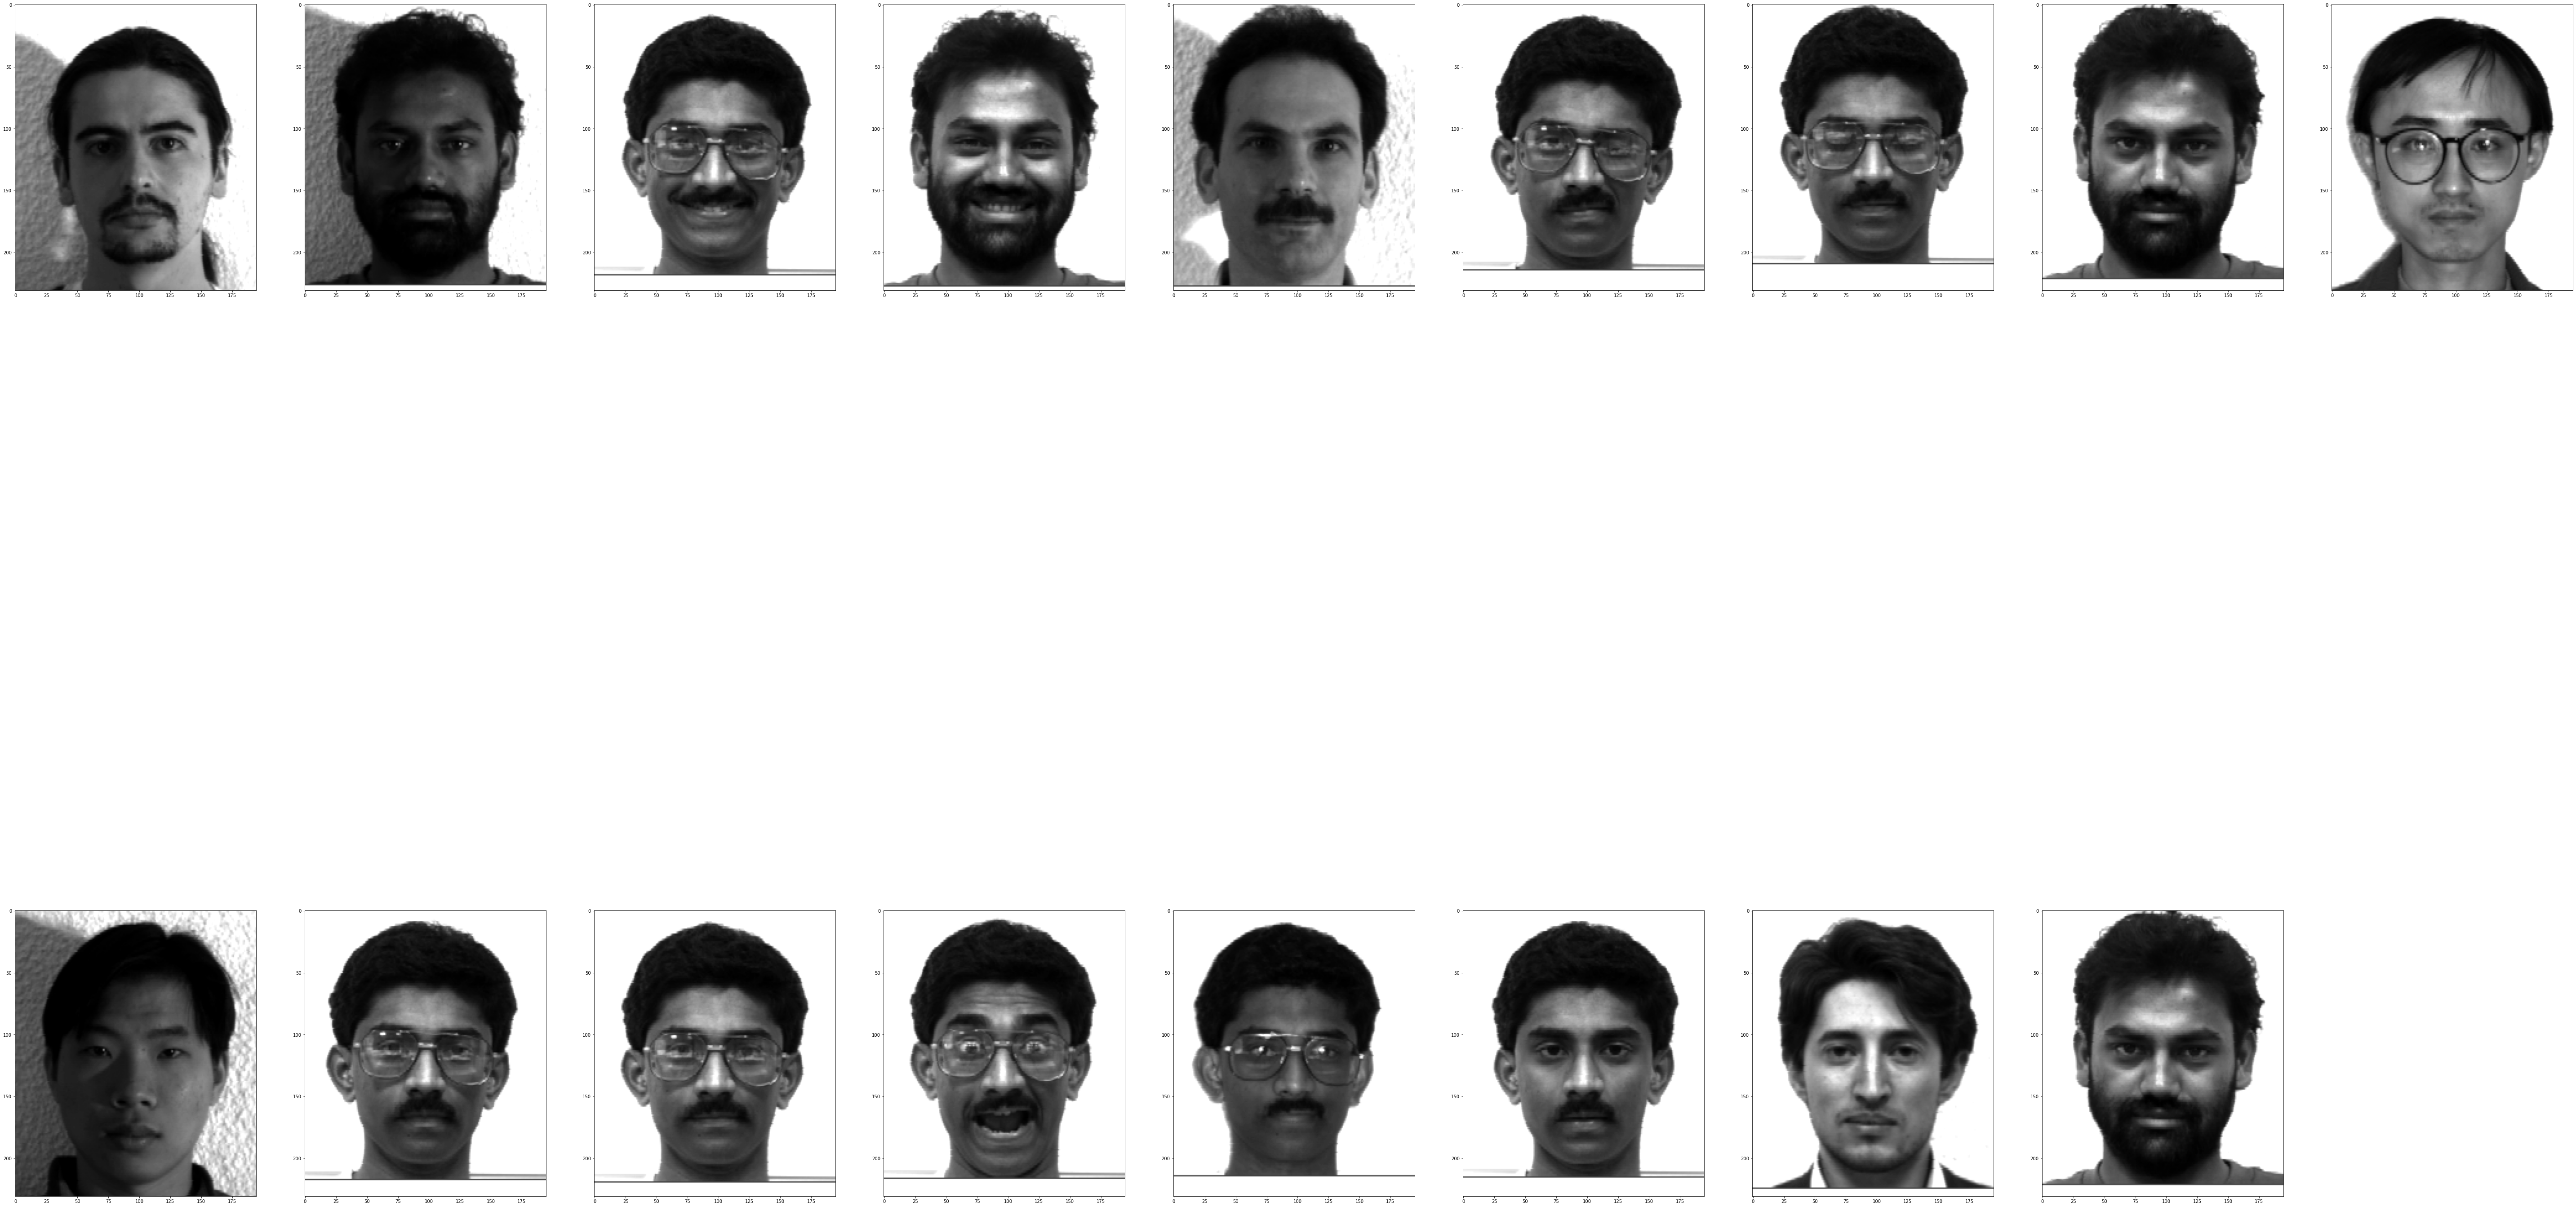

In [49]:
plotImages(images, values[0])

---
# Hashing with Hierarchical Structures

In [50]:
# Class for Defining Node of a Tree
class Node:
    def __init__(self):
        self.m_NodeIndex = -1
        self.m_NodeDepth = -1
        self.m_ParentIndex = -1
        self.m_LeftChildIndex = -1
        self.m_RightChildIndex = -1
        self.m_IsDecisionNode = None
        self.m_HashVector = None
        
    def setNode(self,nodeIndex,nodeDepth,parentIndex):
        self.m_NodeIndex = nodeIndex
        self.m_NodeDepth = nodeDepth
        self.m_ParentIndex = parentIndex

In [51]:
class HashTree:
    def __init__(self,bits):
        self.m_Depth = bits
        self.m_CurrentNodeNum = 0
        self.m_NodeArray = [Node() for _ in range(2**(bits+1)-1)]
    
    def genHashVectors(self,dataLength):
        self.m_NodeArray[0].setNode(0,0,-1)   #Root Node
        self.m_CurrentNodeNum += 1
        
        for nodeCount in range(len(self.m_NodeArray)):
            
            if (self.m_NodeArray[nodeCount].m_NodeIndex == nodeCount and 
                self.m_NodeArray[nodeCount].m_LeftChildIndex == -1 and 
                self.m_NodeArray[nodeCount].m_RightChildIndex == -1 and 
                self.m_NodeArray[nodeCount].m_NodeDepth >= 0):
                
                if self.m_NodeArray[nodeCount].m_NodeDepth != self.m_Depth:
                    self.m_NodeArray[nodeCount].m_IsDecisionNode = True
                    randomVector = np.random.uniform(-1,1,dataLength)
                    self.m_NodeArray[nodeCount].m_HashVector = randomVector / np.linalg.norm(randomVector)
                    
                    lci = self.m_CurrentNodeNum
                    rci = self.m_CurrentNodeNum + 1
                    
                    self.m_NodeArray[nodeCount].m_LeftChildIndex = lci 
                    self.m_NodeArray[nodeCount].m_RightChildIndex = rci 

                    self.m_NodeArray[lci].setNode(lci,self.m_NodeArray[nodeCount].m_NodeDepth+1,
                            self.m_NodeArray[nodeCount].m_NodeIndex)

                    self.m_NodeArray[rci].setNode(rci,self.m_NodeArray[nodeCount].m_NodeDepth+1,
                            self.m_NodeArray[nodeCount].m_NodeIndex)
                    
                    self.m_CurrentNodeNum += 2
                else:
                    self.m_NodeArray[nodeCount].m_IsDecisionNode = False
            else:
                print("Hash Tree Created!!!!!!!!!!!")
                break
    
    def getHashCode(self,data):
        hash_code = []
        nodeCount = 0
        while nodeCount < len(self.m_NodeArray):
            if self.m_NodeArray[nodeCount].m_IsDecisionNode == True:
        
                if np.dot(data,self.m_NodeArray[nodeCount].m_HashVector) > 0:
                    hash_code.append('1')
                    nodeCount = self.m_NodeArray[nodeCount].m_RightChildIndex
                else:
                    hash_code.append('0')
                    nodeCount = self.m_NodeArray[nodeCount].m_LeftChildIndex
            else:
                break
                    
        str_hash_code = ''.join(hash_code)
        return str_hash_code

In [57]:
hash_tree = HashTree(10)
hash_tree.genHashVectors(len(image_vector[0]))

In [58]:
image_dict = {}
for i in range(len(image_vector)):
    hash_code = hash_tree.getHashCode(image_vector[i])
    if hash_code not in image_dict.keys():
        image_dict[hash_code] = [i]
    else:
        image_dict[hash_code].append(i)

In [59]:
keys = list(image_dict.keys())
values = list(image_dict.values())

In [60]:
print(image_dict)

{'1010101011': [0, 14, 99, 111], '0010100011': [1, 92], '1111101110': [2, 5, 13, 15, 21, 46, 48, 50, 52, 54, 55, 58, 63, 66, 67, 68, 73, 75, 83, 84, 87, 90, 94, 100, 101, 102, 104, 110, 112, 115, 121, 130, 134, 135, 136, 137, 141, 143, 150, 154, 155, 156, 161, 163, 164], '0010011110': [3, 4, 32, 47, 95, 140, 157], '1000101110': [6, 11, 106, 148, 153, 158], '1010100000': [7, 82], '1100100011': [8, 38, 60, 61, 78], '1000111001': [9, 37], '1111000100': [10, 86], '1111111101': [12, 51, 71, 76, 80, 119, 120, 129], '1000111000': [16, 107], '1101001010': [17], '0010011001': [18, 43, 159], '1111100010': [19, 36, 40, 69, 118, 123, 146], '0010011011': [20, 31, 42, 44, 56, 81, 124, 133, 147, 152], '1111010001': [22], '1111111110': [23, 30, 34, 35, 39, 41, 49, 64, 77, 85, 91, 96, 97, 98, 103, 109, 125, 127, 128, 131, 138, 144, 162], '1111101010': [24], '1000101000': [25], '1111101101': [26], '1000100100': [27], '1000110011': [28], '1011111100': [29, 93, 126, 132, 139], '1010101001': [33, 65, 72], 

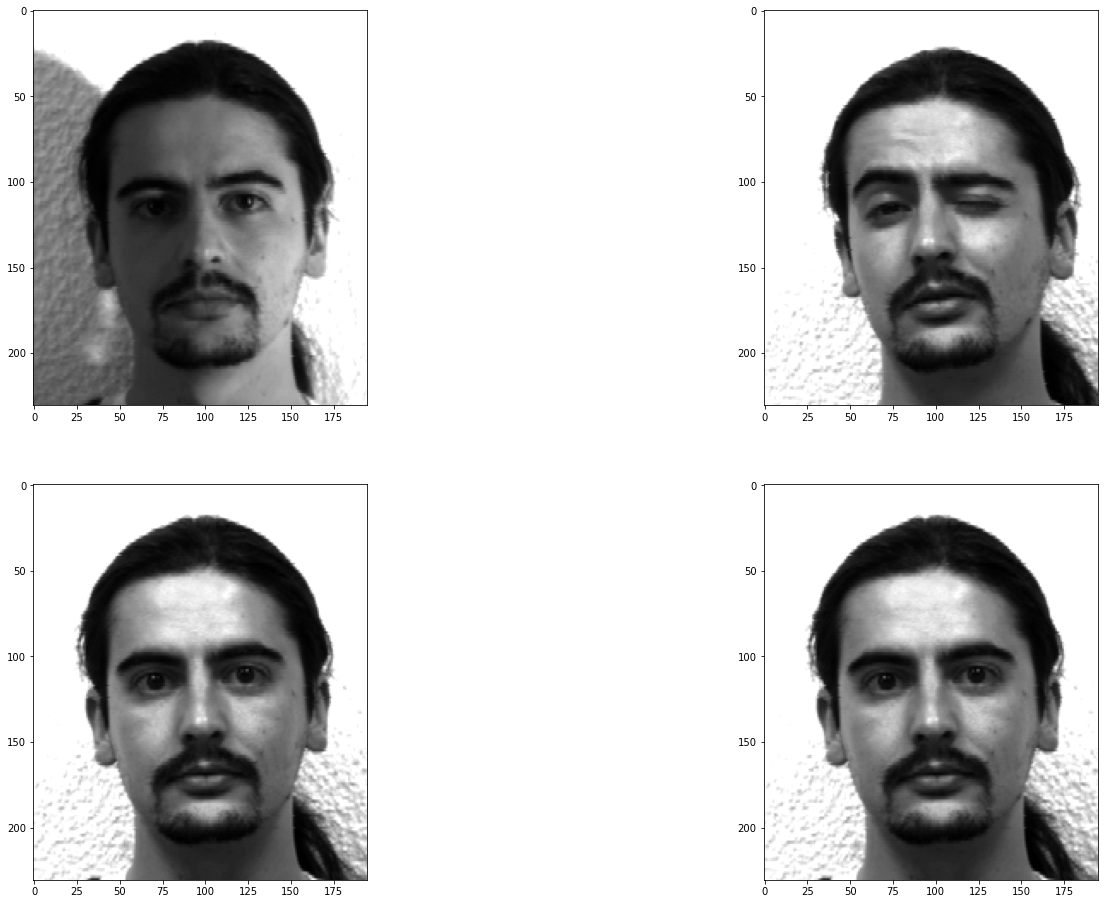

In [61]:
plotImages(images,values[0])